In [11]:
import pandas as pd
import numpy as np

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d kuchhbhi/cpga-iq-placement

  0% 0.00/876 [00:00<?, ?B/s]
100% 876/876 [00:00<00:00, 2.28MB/s]


In [14]:
import zipfile
zip_ref= zipfile.ZipFile('cpga-iq-placement.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
df = pd.read_csv('/content/student_clustering.csv')

In [16]:
df

,cgpa,iq,placed
0,5.13,88,0
1,5.90,113,1
2,8.36,93,1
3,8.27,97,1
4,5.45,110,0
...,...,...,...
195,4.68,89,0
196,8.57,118,1
197,5.85,112,0
198,6.23,108,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
 2   placed  200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB


In [18]:
from matplotlib import pyplot as plt

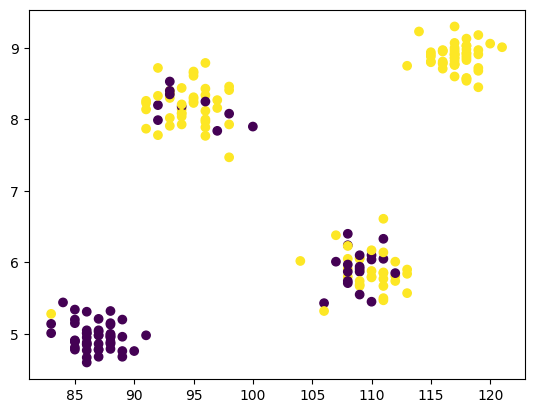

In [19]:
plt.scatter(df['iq'], df['cgpa'], c=df['placed'])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.iloc[:,:2]

In [23]:
X

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [24]:
y = df.iloc[:,2:]

In [25]:
y

,placed
0,0
1,1
2,1
3,1
4,0
...,...
195,0
196,1
197,0
198,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Model training

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_train

array([[-0.56820757,  0.59191635],
       [ 1.22980507,  1.24960118],
       [ 0.76182918, -0.64124271],
       [-1.35021992, -1.38113815],
       [ 0.89729588, -0.4768215 ],
       [ 1.29138085,  1.24960118],
       [-0.6975167 ,  0.92075876],
       [ 0.98350197,  1.33181178],
       [ 1.19285961,  1.24960118],
       [ 0.30616844, -0.31240029],
       [-0.53741968,  0.67412695],
       [-0.71598943,  0.83854816],
       [-1.33174719, -1.38113815],
       [-1.18396533, -1.29892754],
       [-0.66057124,  0.92075876],
       [ 0.85419284, -0.72345331],
       [-0.80219552,  0.75633756],
       [-0.78988036,  0.59191635],
       [-1.34406234, -1.13450633],
       [-1.4117957 , -1.05229573],
       [-0.65441366,  0.50970574],
       [ 0.79261707, -0.88787452],
       [-1.2455411 , -1.13450633],
       [ 0.65715036, -0.64124271],
       [-0.80219552,  0.59191635],
       [ 1.19285961,  1.08517997],
       [ 0.49705334, -0.80566392],
       [-1.12854713, -1.54555935],
       [ 0.70641098,

In [34]:
X_test = scaler.transform(X_test)

In [35]:
X_test

array([[-1.04234104, -1.54555935],
       [ 1.1128111 ,  1.16739058],
       [-0.67904397,  0.59191635],
       [-1.08544409, -1.21671694],
       [-0.56204999,  0.59191635],
       [ 1.2482778 ,  1.24960118],
       [-1.18396533, -1.21671694],
       [-0.56820757,  0.50970574],
       [ 0.58941701, -0.64124271],
       [ 1.18670203,  1.24960118],
       [ 1.10049594,  1.24960118],
       [ 1.14359899,  1.33181178],
       [ 0.91576862, -0.31240029],
       [-0.94997738,  0.34528454],
       [-0.58668031,  0.18086333],
       [-0.75909248,  0.83854816],
       [ 1.21748992,  1.16739058],
       [-1.35021992, -1.21671694],
       [ 0.71872613, -0.64124271],
       [ 0.84187769, -0.4768215 ]])

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
pred = model.predict(X_test)

In [40]:
y_test

,placed
73,1
45,1
58,0
64,0
70,1
86,1
128,0
55,1
72,1
172,1


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
score = accuracy_score(y_test, pred)

In [46]:
score

0.85

In [47]:
from mlxtend.plotting import plot_decision_regions

In [51]:
import numpy as np

In [55]:
y_train_array = y_train.values

<Axes: >

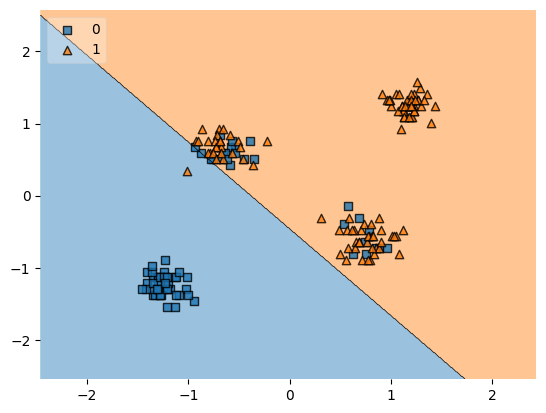

In [58]:
# import numpy as np

plot_decision_regions(X_train, np.array(y_train).flatten(), clf=model, legend=2)